In [ ]:
import konlpy
from konlpy.tag import Okt, Hannanum

import pandas as pd
import numpy as np

from collections import Counter

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from wordcloud import WordCloud
import re
from ast import comprehension

In [ ]:
import os
import matplotlib.pyplot as plt
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

seed = 1234

In [ ]:
labeled = pd.read_csv('comments_labeled.csv')
predicted = pd.read_csv('predicted_comment_all.csv')

In [ ]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      19500 non-null  object
 1   comment   19500 non-null  object
 2   recomm    19500 non-null  int64 
 3   unrecomm  19500 non-null  int64 
 4   labeled   19500 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 761.8+ KB


In [ ]:
predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51090 entries, 0 to 51089
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  51090 non-null  object
 1   labeled  51090 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 798.4+ KB


In [ ]:
comparison = labeled['labeled'] == predicted['labeled'].iloc[:19500]
comparison.value_counts()

labeled
True     16276
False     3224
Name: count, dtype: int64

In [ ]:
labeled_non_movie = labeled[labeled['labeled'] == 0]
predicted_non_movie = predicted[predicted['labeled'] == 0]

In [ ]:
text_labeled = ' '.join(li for li in labeled_non_movie['comment'].astype(str))
text_predicted = ' '.join(li for li in predicted_non_movie['comment'].astype(str))

In [ ]:
text_labeled = re.sub('[^가-힣]', ' ', text_labeled) # 찾을패턴, 변경할 값, 원하는 텍스트 -> 이 방식으로 replace
text_predicted = re.sub('[^가-힣]', ' ', text_predicted)

In [ ]:
okt = Okt()
nouns_labeled = okt.nouns(text_labeled)
nouns_predicted = okt.nouns(text_predicted)

In [ ]:
# 불용어 제거 (필요나 희망에 따라 list 목록으로 보유 or text로 보유)
stopwords = ['네', '너무', '는', '을', '의', '이', '가', '으로', '로',
             '에', '등', '들', '수', '도', '안', '은']
# 단어가 되는 최소단위
tokenized_labeled = [word for word in nouns_labeled if word not in stopwords and len(word) > 1]
tokenized_predicted = [word for word in nouns_predicted if word not in stopwords and len(word) > 1]

In [ ]:
word_freq_labeled = Counter(tokenized_labeled)
print(word_freq_labeled)

Counter({'자막': 2546, '구매': 1423, '씨발': 1302, '다운': 1162, '재생': 1057, '영화': 1036, '네이버': 945, '환불': 945, '다운로드': 893, '영상': 865, '더빙': 706, '화질': 702, '진짜': 552, '대여': 476, '소장': 470, '부가': 406, '시리즈': 361, '결제': 360, '화면': 353, '가격': 346, '스트리밍': 325, '파일': 323, '영어': 281, '보고': 278, '다시': 266, '소리': 266, '문제': 262, '모니터': 252, '확인': 250, '싱크': 238, '댓글': 236, '사람': 232, '그냥': 230, '플레이어': 220, '지원': 217, '가요': 213, '미지': 200, '이용': 200, '언제': 196, '무료': 190, '기간': 189, '다른': 186, '고객': 183, '지금': 181, '하나': 179, '사용': 177, '생각': 177, '만원': 177, '컴퓨터': 171, '건가': 170, '여기': 168, '티비': 168, '기기': 163, '모바일': 161, '계속': 157, '구입': 156, '정말': 156, '감상': 151, '쿠폰': 150, '이건': 145, '번역': 142, '무슨': 140, '정도': 139, '바로': 136, '시간': 133, '장난': 129, '보기': 128, '서비스': 128, '센터': 126, '동영상': 124, '영화관': 123, '고화질': 123, '스토어': 122, '중간': 122, '취소': 121, '오류': 121, '추가': 120, '유튜브': 118, '설정': 114, '때문': 113, '어디': 112, '제공': 110, '연결': 109, '상품': 109, '패키지': 108, '경우': 107, '해결': 104, '하나요': 104

In [ ]:
word_freq_predicted = Counter(tokenized_predicted)
print(word_freq_predicted)

Counter({'자막': 6431, '구매': 3464, '다운': 2818, '씨발': 2603, '재생': 2452, '네이버': 2316, '환불': 2264, '다운로드': 2136, '영화': 2068, '영상': 1980, '더빙': 1774, '화질': 1730, '대여': 1294, '진짜': 1234, '소장': 1208, '부가': 879, '결제': 863, '가격': 851, '파일': 840, '시리즈': 796, '화면': 786, '스트리밍': 756, '영어': 748, '다시': 612, '보고': 612, '확인': 604, '소리': 600, '댓글': 570, '문제': 556, '싱크': 552, '모니터': 543, '가요': 513, '플레이어': 506, '지원': 499, '그냥': 490, '이용': 490, '언제': 460, '만원': 443, '기간': 437, '미지': 434, '무료': 434, '고객': 430, '쿠폰': 425, '티비': 414, '사용': 411, '사람': 407, '다른': 406, '지금': 396, '기기': 395, '건가': 393, '컴퓨터': 388, '모바일': 384, '구입': 374, '여기': 367, '계속': 365, '하나': 361, '생각': 342, '번역': 332, '이건': 331, '감상': 321, '장난': 313, '무슨': 308, '고화질': 308, '제발': 308, '스토어': 307, '시간': 302, '바로': 297, '설정': 292, '센터': 291, '추가': 290, '보기': 286, '제공': 285, '어디': 284, '정말': 281, '서비스': 277, '경우': 272, '취소': 270, '동영상': 269, '유튜브': 266, '정도': 265, '연결': 262, '상품': 260, '때문': 257, '오류': 256, '중간': 254, '패키지': 253, '미리보기': 246, 

In [ ]:
# f = open('Non_Movie_Comments_Preprocessed.txt', 'w', encoding='utf-8')
# f.write(' '.join(word_freq)) # 키값만 저장됨, 따라서 txt 파일에는 개수가 입력되지 않음
# f.close()

In [ ]:
# type(word_freq) # 딕셔너리 형태지만 Counter 라는 자료구조 (내부만 딕셔너리)

collections.Counter

In [ ]:
# 빈도가 가장 많은 10개 단어 추출
top_words_labeled = word_freq_labeled.most_common(26) # 최대 빈도 단어 추출
top_words_predicted = word_freq_predicted.most_common(26)

# 시각화를 위해 데이터프레임으로 변환
top_word_labeled_df = pd.DataFrame(columns=['단어', '빈도수'], data=top_words_labeled)
top_word_predicted_df = pd.DataFrame(columns=['단어', '빈도수'], data=top_words_predicted)

In [ ]:
remove_labeled = ['씨발', '네이버', '영화', '진짜', '보고', '다시', '소']
top_word_labeled_df = top_word_labeled_df[~top_word_labeled_df['단어'].isin(remove_labeled)]
top_word_labeled_df

20

In [ ]:
remove_predicted = ['씨발', '네이버', '영화', '진짜', '다시', '보고']
top_word_predicted_df = top_word_predicted_df[~top_word_predicted_df['단어'].isin(remove_predicted)]
top_word_predicted_df

,단어,빈도수
0,자막,6431
1,구매,3464
2,다운,2818
4,재생,2452
6,환불,2264
7,다운로드,2136
9,영상,1980
10,더빙,1774
11,화질,1730
12,대여,1294


In [ ]:
# 워드 클라우드 시각화 하기 위해선 딕셔너리 타입
word_dic_labeled = top_word_labeled_df.set_index('단어').to_dict()['빈도수']
word_dic_labeled

{'자막': 2546,
 '구매': 1423,
 '다운': 1162,
 '재생': 1057,
 '환불': 945,
 '다운로드': 893,
 '영상': 865,
 '더빙': 706,
 '화질': 702,
 '대여': 476,
 '소장': 470,
 '부가': 406,
 '시리즈': 361,
 '결제': 360,
 '화면': 353,
 '가격': 346,
 '스트리밍': 325,
 '파일': 323,
 '영어': 281,
 '소리': 266}

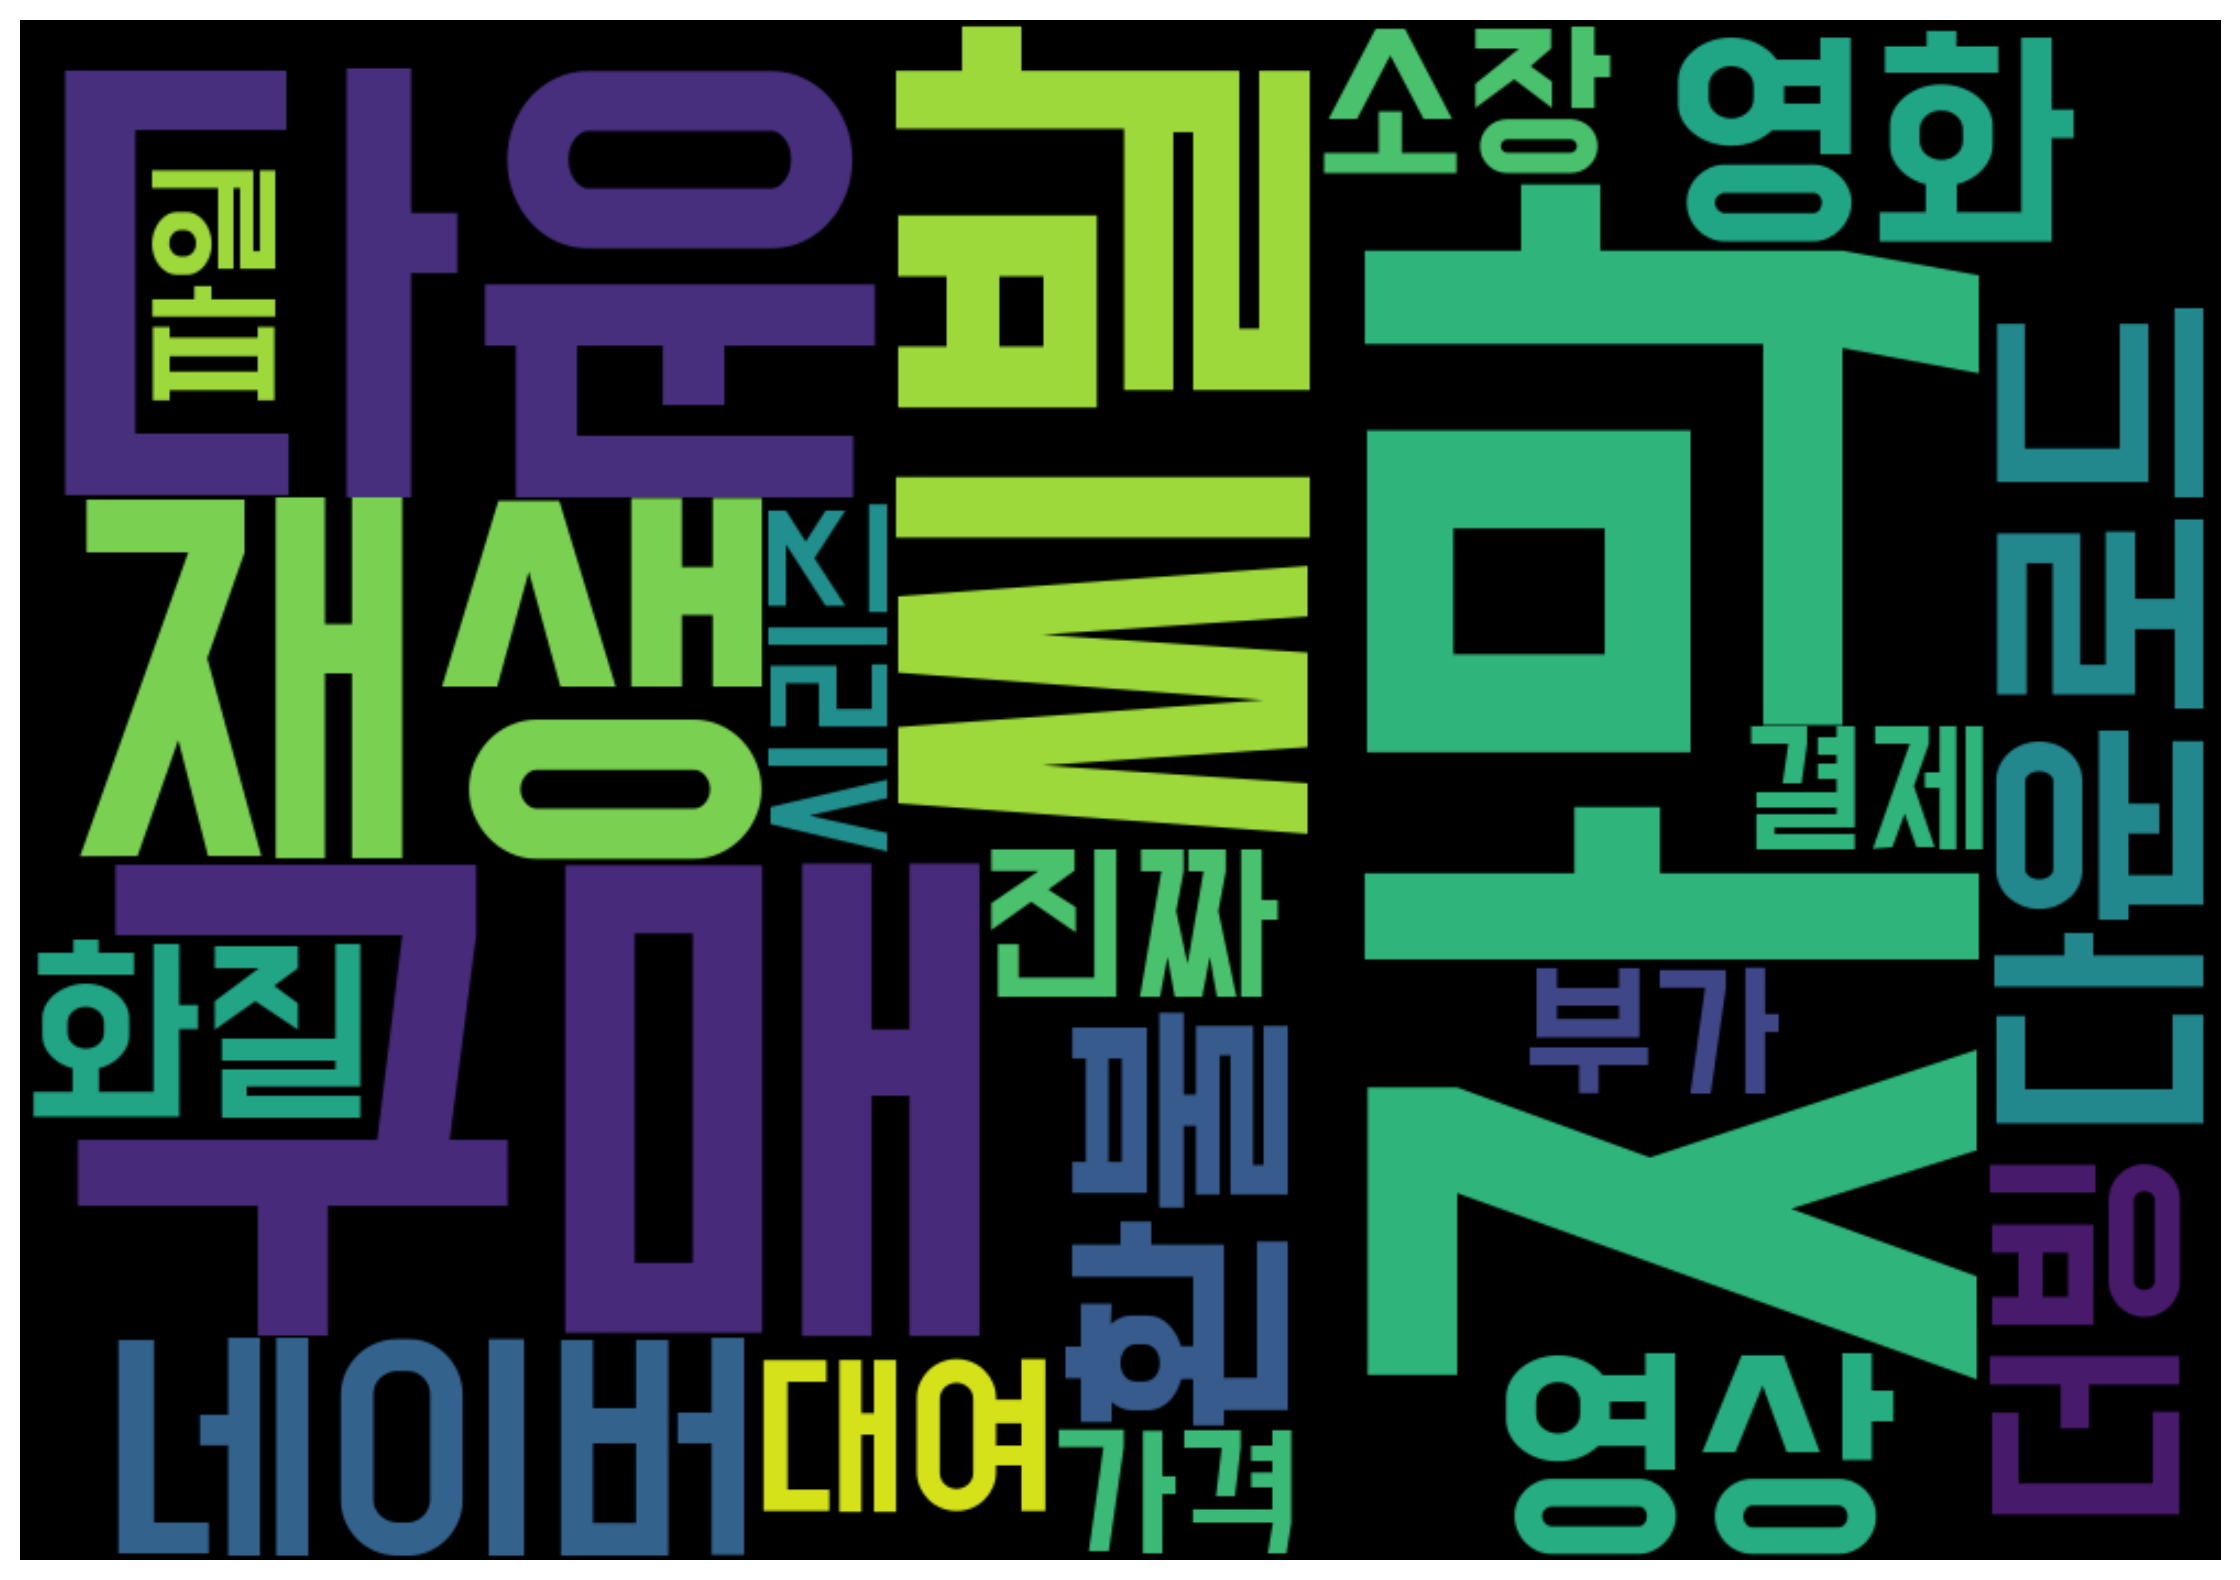

In [ ]:
# 글꼴 설정
font_path = 'BMDOHYEON_ttf.ttf'

wc = WordCloud(width=1000, height=700, font_path=font_path)
# generate_from_frequencies 로 할 시 빈도수 고려
img_wordcloud = wc.generate_from_frequencies(word_dic_labeled)

plt.figure(figsize=(25, 10), dpi=200)
plt.axis('off')
plt.imshow(img_wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
word_dic_predicted = top_word_predicted_df.set_index('단어').to_dict()['빈도수']
word_dic_predicted

{'자막': 6431,
 '구매': 3464,
 '다운': 2818,
 '재생': 2452,
 '환불': 2264,
 '다운로드': 2136,
 '영상': 1980,
 '더빙': 1774,
 '화질': 1730,
 '대여': 1294,
 '소장': 1208,
 '부가': 879,
 '결제': 863,
 '가격': 851,
 '파일': 840,
 '시리즈': 796,
 '화면': 786,
 '스트리밍': 756,
 '영어': 748}

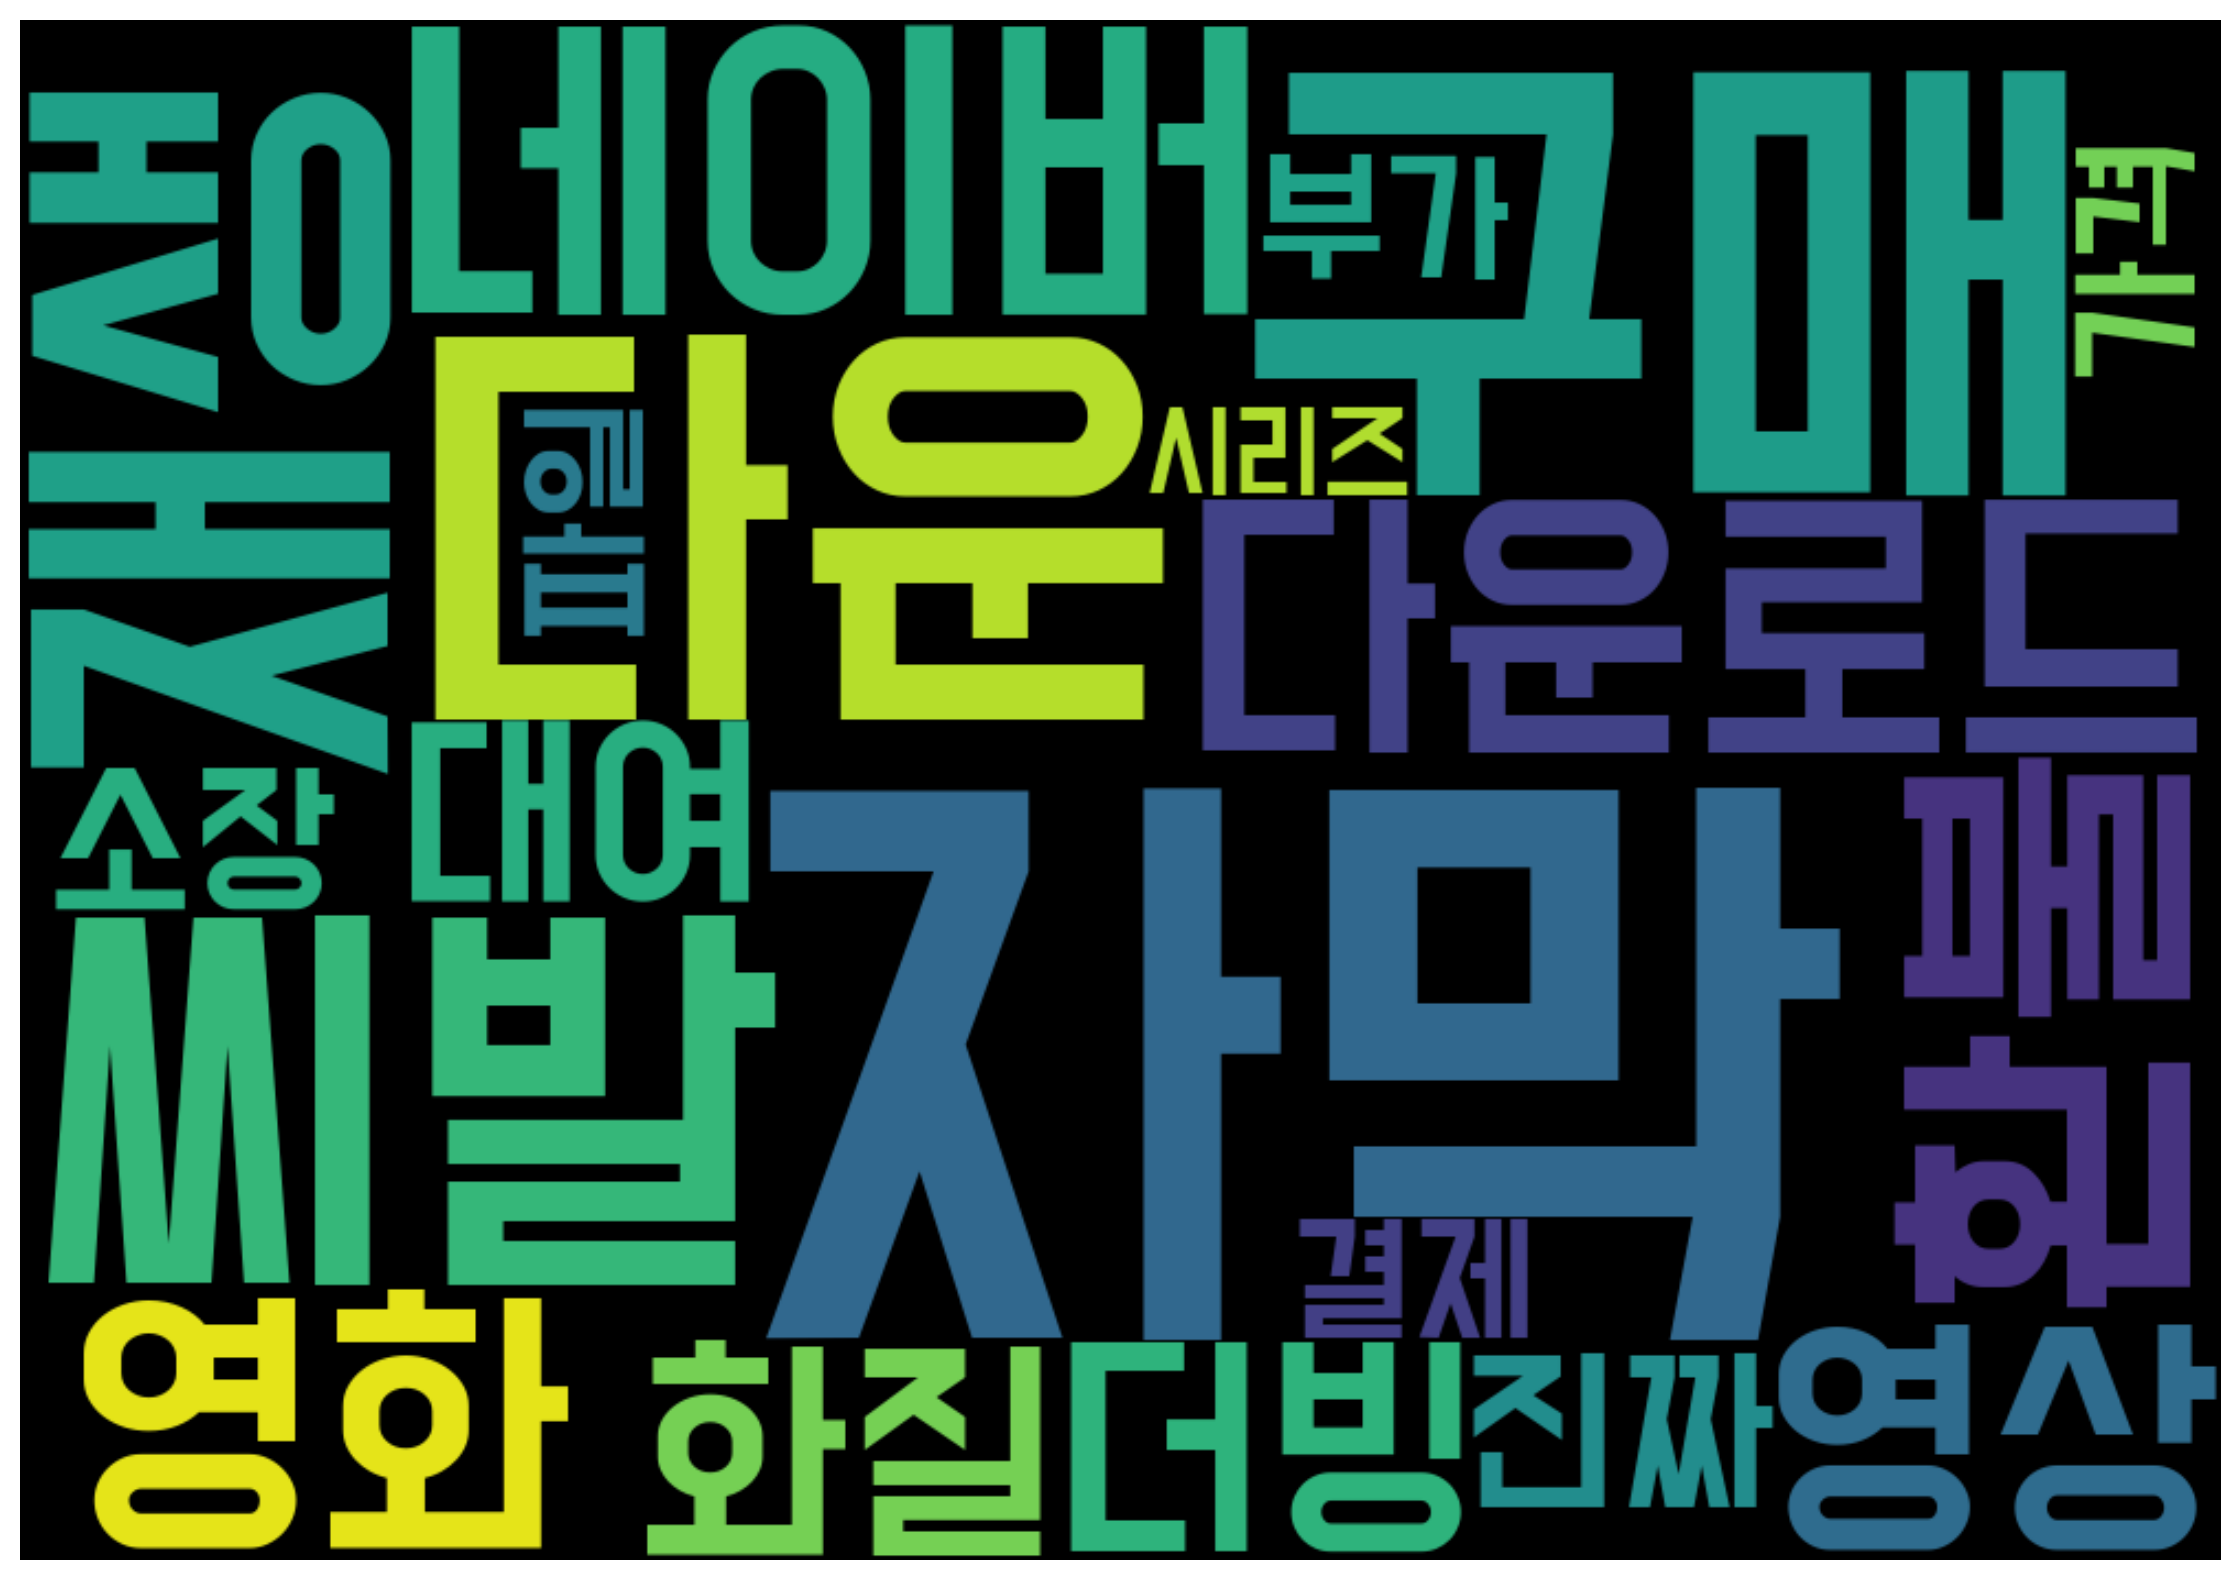

In [ ]:
# 글꼴 설정
font_path = 'BMDOHYEON_ttf.ttf'

wc = WordCloud(width=1000, height=700, font_path=font_path)
# generate_from_frequencies 로 할 시 빈도수 고려
img_wordcloud = wc.generate_from_frequencies(word_dic_predicted)

plt.figure(figsize=(25, 10), dpi=200)
plt.axis('off')
plt.imshow(img_wordcloud, interpolation='bilinear')
plt.show()

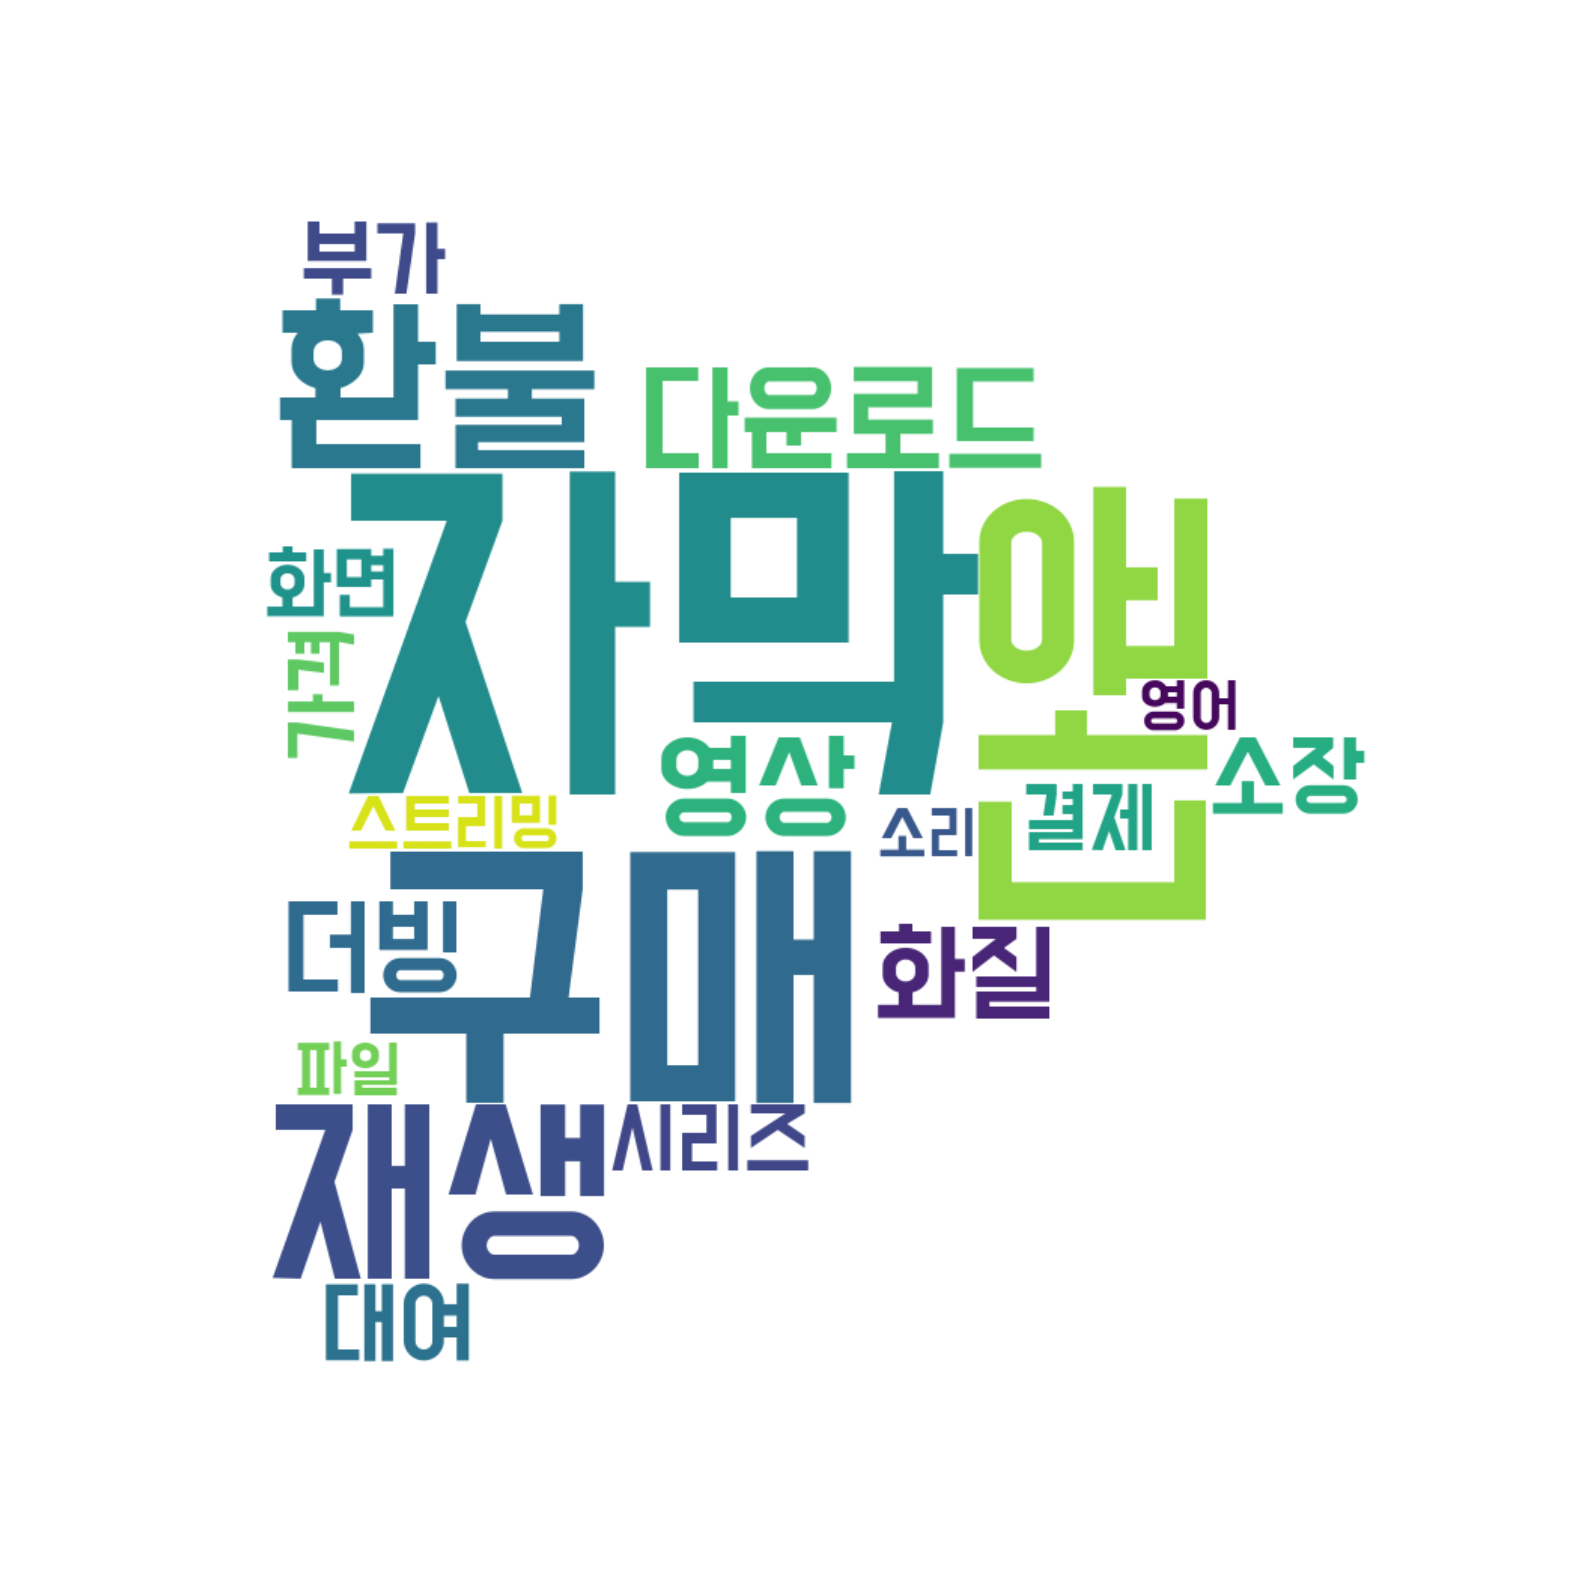

In [ ]:
from PIL import Image

# 워드 클라우드 이미지 로드
mask_image = '네이버 시리즈온.png'
mask = np.array(Image.open(mask_image))

wc = WordCloud(background_color='white', width=1000, height=700, font_path=font_path, mask=mask)
img_wordcloud = wc.generate_from_frequencies(word_dic_labeled)

# 시각화
plt.figure(figsize=(25, 10), dpi=200)
plt.axis('off')
plt.imshow(img_wordcloud, interpolation='bilinear')
plt.show()

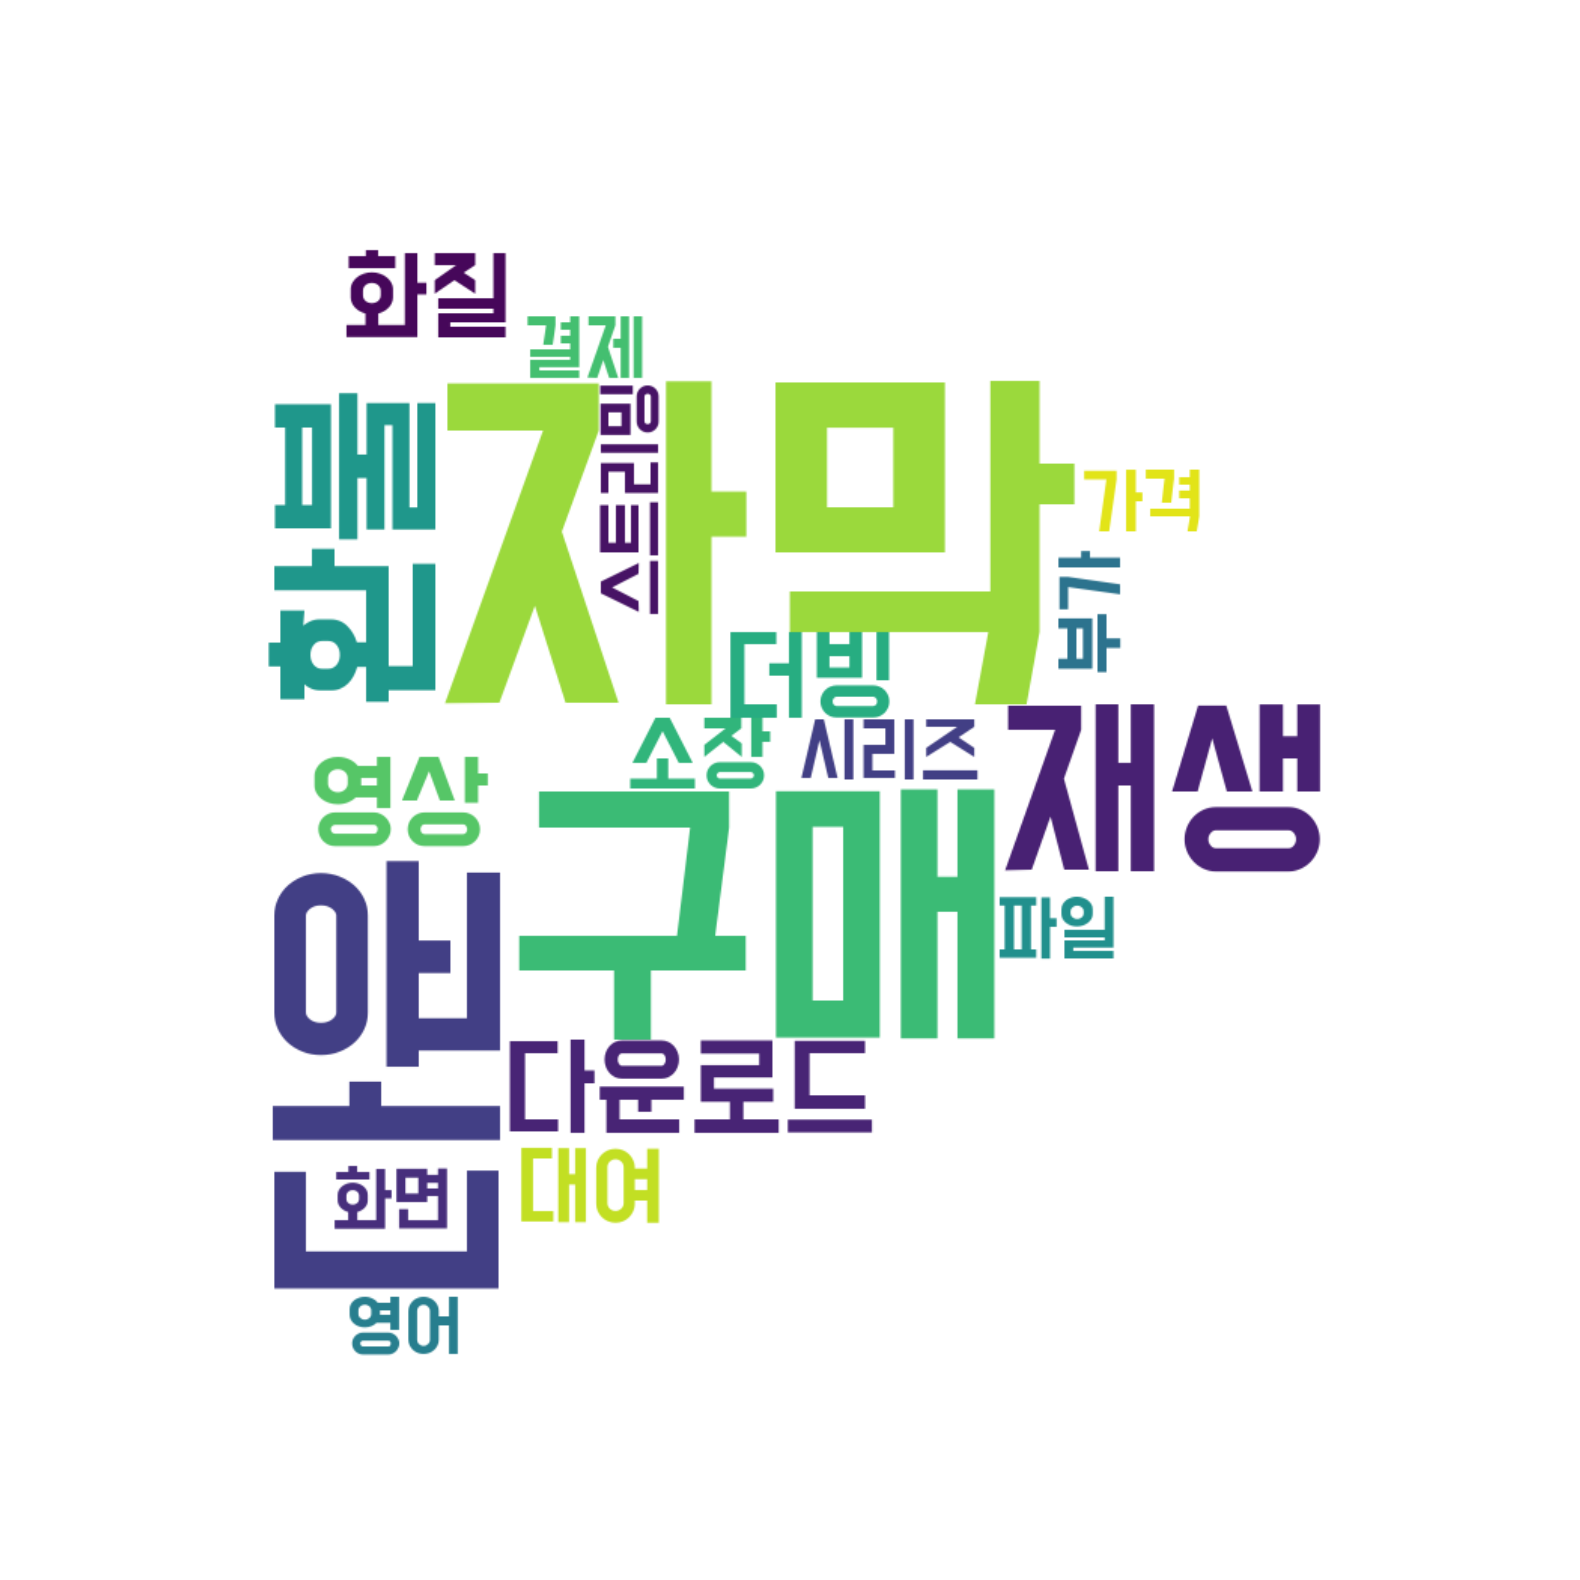

In [ ]:
from PIL import Image

# 워드 클라우드 이미지 로드
mask_image = '네이버 시리즈온.png'
mask = np.array(Image.open(mask_image))

wc = WordCloud(background_color='white', width=1000, height=700, font_path=font_path, mask=mask)
img_wordcloud = wc.generate_from_frequencies(word_dic_predicted)

# 시각화
plt.figure(figsize=(25, 10), dpi=200)
plt.axis('off')
plt.imshow(img_wordcloud, interpolation='bilinear')
plt.show()